In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import warnings 
warnings.filterwarnings("ignore")

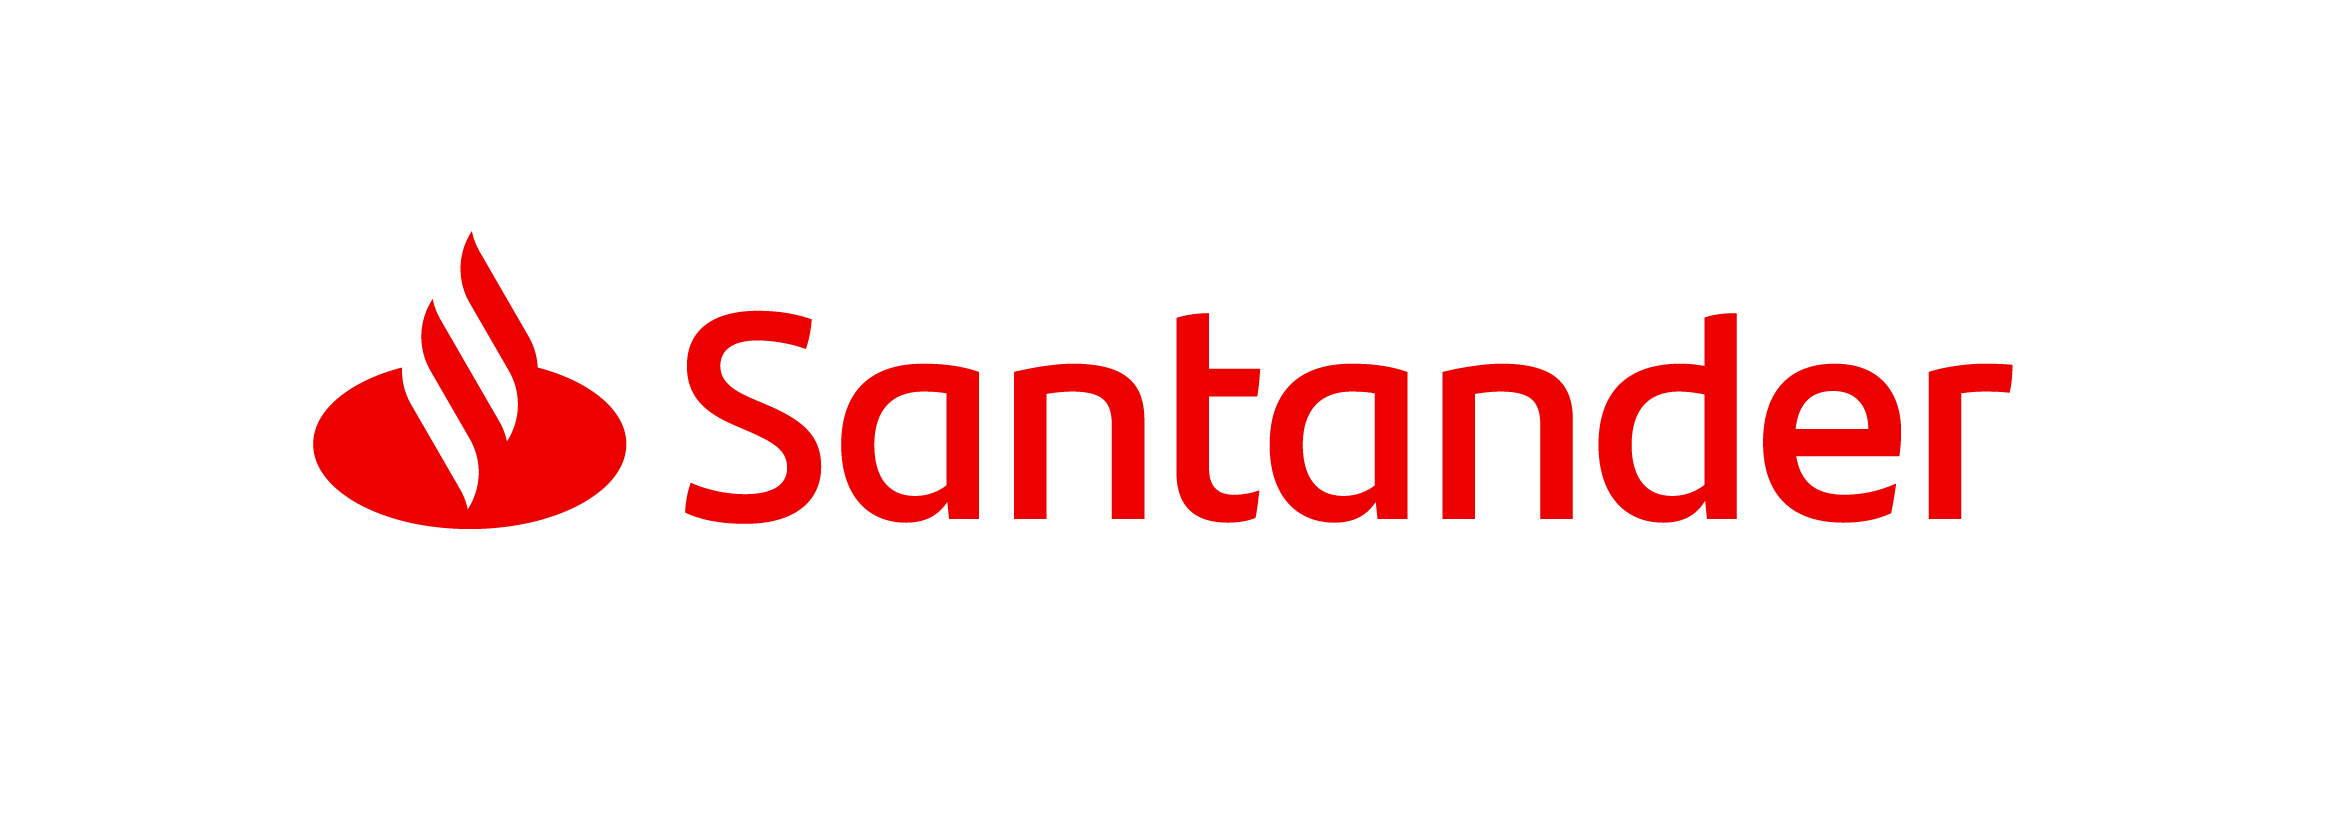

In [2]:
from IPython.display import Image
Image('santander-bank.png')

In [3]:
df_train=pd.read_csv(r"G:\Santander Prediction\train.csv")
df_test=pd.read_csv(r"G:\Santander Prediction\test.csv")
print("Data Loaded Successful")

print("Shape of Training Data : ",df_train.shape)
print("Shape of Test Data     : ",df_test.shape)

Data Loaded Successful
Shape of Training Data :  (200000, 202)
Shape of Test Data     :  (200000, 201)


In [4]:
#Creating a function to display all columns
def display_all(df):
    with pd.option_context("display.max_columns", 250):
        display(df)

display_all(df_train.head())

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.3523,8.5426,3.6159,4.1569,3.0454,7.8522,-11.5100,7.5109,31.5899,9.5018,8.2736,10.1633,0.1225,12.5942,14.5697

In [5]:
display_all(df_train.describe())

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [6]:
#Checking for datatypes for the training data
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [7]:
#Checking for NaN Values
#We will be creating a Dataframe to store feature name and number of missing values associated with it.
missing_df=pd.DataFrame()
missing_df['Column']=df_train.isnull().sum().keys()
missing_df['Values']=df_train.isnull().sum().values.tolist()
missing_df[missing_df['Values']>0]

,Column,Values


In [8]:
#Checking for Test Data 
missing_df=pd.DataFrame()
missing_df['Column']=df_test.isnull().sum().keys()
missing_df['Values']=df_test.isnull().sum().values.tolist()
missing_df[missing_df['Values']>0]

,Column,Values


0    179902
1     20098
Name: target, dtype: int64


''

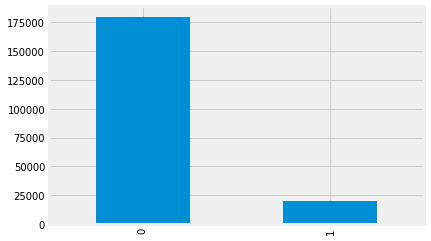

In [9]:
#Target Variable
print(df_train['target'].value_counts())
df_train['target'].value_counts().plot.bar();""

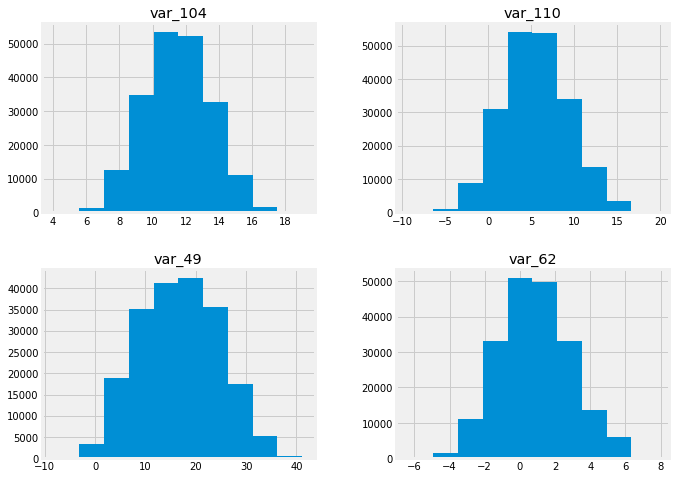

In [10]:
#Printing Histogram of some random columns
columns_list=list(df_train.columns[2:])
random_column = [np.random.choice(columns_list) for i in range(4)]

df_train[random_column].hist(figsize=(10,8));

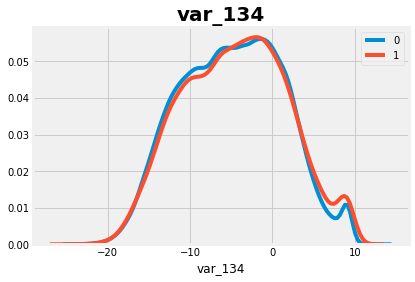

In [11]:
#Desity plot of some random columns
target_0 = df_train.loc[df_train['target'] == 0]
target_1 = df_train.loc[df_train['target'] == 1]

random_column_2 =np.random.choice(columns_list)

plt.title(random_column_2,fontsize=20,fontweight='bold')

sns.distplot(target_0[random_column_2], hist=False,label='0');
sns.distplot(target_1[random_column_2], hist=False,label='1');

We can observe that there is a considerable number of features with significant different distribution for the two target values


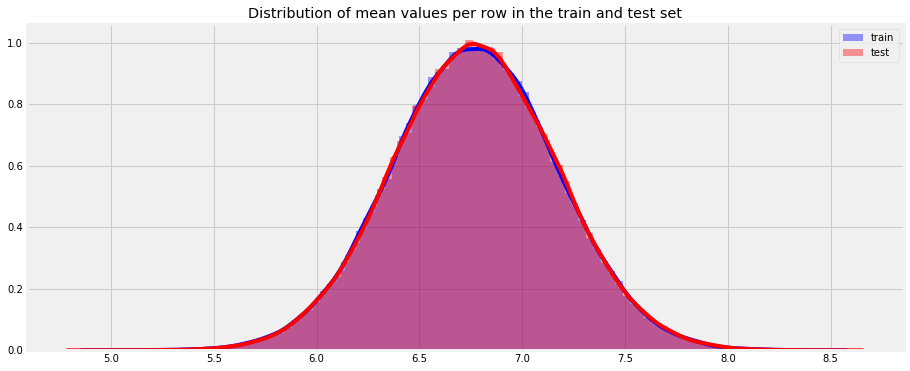

In [12]:
plt.figure(figsize=(14,6))
columns = df_train.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.distplot(df_train[columns].mean(axis=1),color="blue", kde=True,bins=100, label='train')
sns.distplot(df_test[columns].mean(axis=1),color="red", kde=True,bins=100, label='test')
plt.legend()
plt.show()

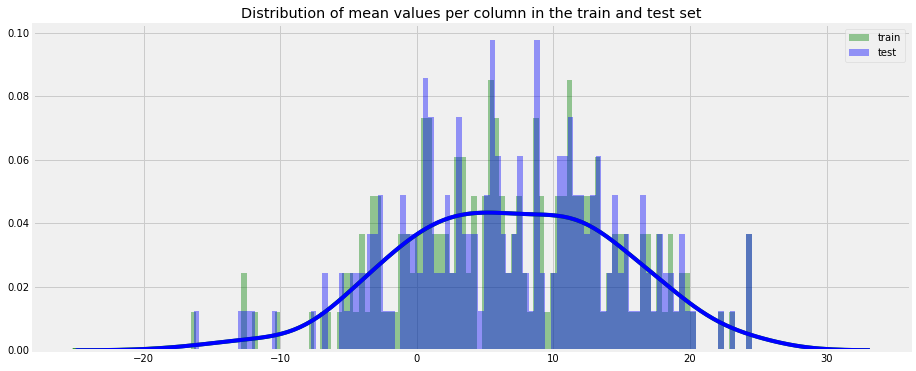

In [13]:
plt.figure(figsize=(14,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.distplot(df_train[columns].mean(axis=0),color="green",kde=True,bins=100, label='train')
sns.distplot(df_test[columns].mean(axis=0),color="blue", kde=True,bins=100, label='test')
plt.legend()
plt.show()

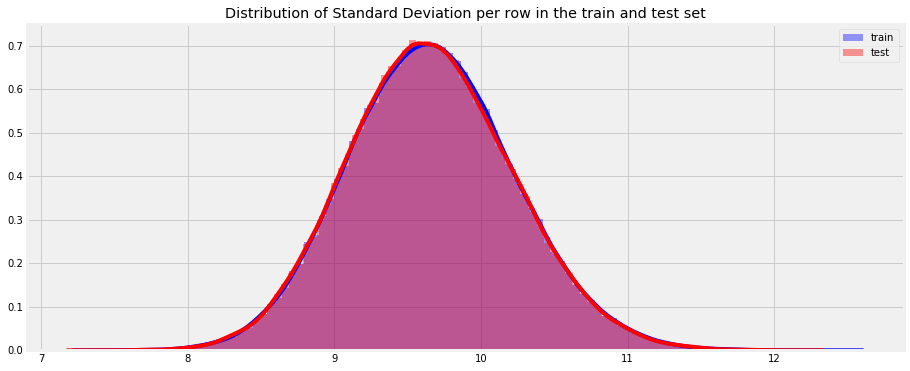

In [14]:
plt.figure(figsize=(14,6))
columns = df_train.columns.values[2:202]
plt.title("Distribution of Standard Deviation per row in the train and test set")
sns.distplot(df_train[columns].std(axis=1),color="blue", kde=True,bins=100, label='train')
sns.distplot(df_test[columns].std(axis=1),color="red", kde=True,bins=100, label='test')
plt.legend()
plt.show()

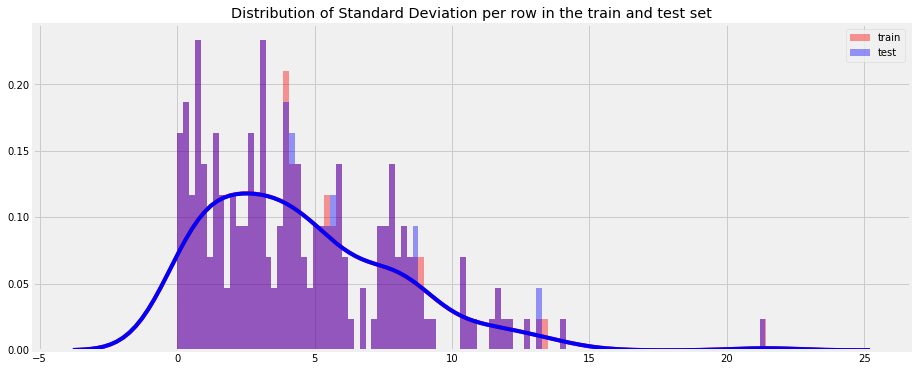

In [15]:
plt.figure(figsize=(14,6))
columns = df_train.columns.values[2:202]
plt.title("Distribution of Standard Deviation per row in the train and test set")
sns.distplot(df_train[columns].std(axis=0),color="red", kde=True,bins=100, label='train')
sns.distplot(df_test[columns].std(axis=0),color="blue", kde=True,bins=100, label='test')
plt.legend()
plt.show()

In [16]:
#Seperating Dependent and Independent Variables
X=df_train.drop(['ID_code','target'],axis=1)
y=df_train['target']

In [17]:
#Normalising the values
from sklearn.preprocessing import normalize, StandardScaler, RobustScaler
Scaler=StandardScaler()
X_Scaled = Scaler.fit_transform(X)

X_test_final = Scaler.fit_transform(df_test.drop(['ID_code'],axis=1))

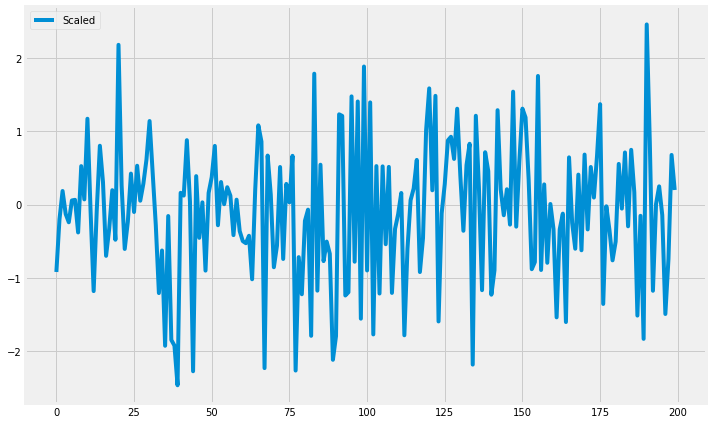

In [18]:
series_number=50
plt.figure(figsize=(10,6))
plt.plot(X_Scaled[series_number],label='Scaled')
plt.legend(loc='best')
plt.tight_layout()

Accuracy Score  :  0.781435
F1 Score        :  0.4170838264072164
Precision Score :  0.28490804359468186
Recall Score    :  0.7780874428553921
ROC_AUC Score   :  0.7799482052638088


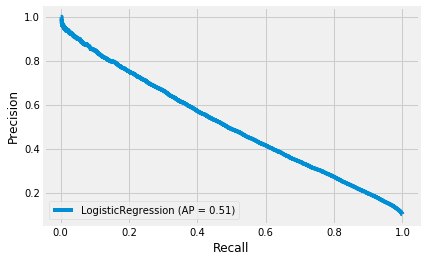

In [19]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import recall_score,precision_score,f1_score,plot_precision_recall_curve,roc_auc_score,accuracy_score
classifier=LogisticRegression(penalty='l2',
                              dual=False,
                              tol=0.0001,
                              C=1.0,
                              fit_intercept=True,
                              intercept_scaling=1,
                              class_weight="balanced",
                              random_state=None,
                              solver='lbfgs',
                              max_iter=400,
                              multi_class='auto',
                              verbose=0,
                              warm_start=False,
                              n_jobs=None,
                              l1_ratio=None)


from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)


#Creating empty list to store results
accuracy_scores=[]
f1_scores=[]
precision_scores=[]
Recall_scores=[]
ROC_AUC_Score=[]

#X is the feature and y is the target variable
for train_index,test_index in skf.split(X_Scaled,y):
    X_train,X_test=X_Scaled[train_index],X_Scaled[test_index]
    y_train,y_test=y[train_index],y[test_index]
    
    #fitting and evaluating the model
    classifier.fit(X_train,y_train)
    prediction=classifier.predict(X_test)
    
    #Calculating scores
    score_accuracy=accuracy_score(y_test,prediction)
    score_f1=f1_score(y_test,prediction)
    score_precision=precision_score(y_test,prediction)
    score_recall=recall_score(y_test,prediction)
    score_roc=roc_auc_score(y_test,prediction)
    
    #Appending scores
    accuracy_scores.append(score_accuracy)
    f1_scores.append(score_f1)
    precision_scores.append(score_precision)
    Recall_scores.append(score_recall)
    ROC_AUC_Score.append(score_roc)
    
    
print('Accuracy Score  : ',np.mean(accuracy_scores))
print('F1 Score        : ',np.mean(f1_scores))
print('Precision Score : ',np.mean(precision_scores))
print('Recall Score    : ',np.mean(Recall_scores))
print('ROC_AUC Score   : ',np.mean(ROC_AUC_Score))
    
plot_precision_recall_curve(classifier,X_Scaled,y);

In [24]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_Ros, y_Ros = ros.fit_sample(X_Scaled,y)

y_Ros.value_counts()

1    179902
0    179902
Name: target, dtype: int64

In [63]:
import lightgbm as lgb
param = {
    'bagging_freq': 5,
    'bagging_fraction': 0.335,
    'boost_from_average':'false',
    'boost': 'gbdt',
    'feature_fraction': 0.041,
    'learning_rate': 0.08,
    'max_depth': -1,
    'metric':'auc',
    'min_data_in_leaf': 80,
    'min_sum_hessian_in_leaf': 10.0,
    'num_leaves': 13,
    'num_threads': 8,
    'tree_learner': 'serial',
    'objective': 'binary', 
    'verbosity': -1
}

from sklearn.model_selection import StratifiedKFold
skf=StratifiedKFold(n_splits=10,shuffle=True,random_state=42)

ROC_AUC_Score=[]

#X is the feature and y is the target variable
for train_index,test_index in skf.split(X_Ros, y_Ros):
    X_train,X_test=X_Ros[train_index],X_Ros[test_index]
    y_train,y_test=y_Ros[train_index],y_Ros[test_index]
    
    #fitting and evaluating the model
    Iterations=500
    d_train = lgb.Dataset(X_train, label=y_train)
    clf = lgb.train(param, d_train, Iterations)
    prediction=clf.predict(X_test)
            
    score=roc_auc_score(y_test,prediction)
    ROC_AUC_Score.append(score)

print('ROC_AUC Score   : ',np.mean(ROC_AUC_Score))    

ROC_AUC Score   :  0.9180557161005524


In [64]:
ROC_AUC_Score

[0.9206867314825963,
 0.9173771587170892,
 0.9176689728348827,
 0.9181057393003833,
 0.918693150199867,
 0.9184258192974233,
 0.9181796106230347,
 0.9163554176382963,
 0.917709257907163,
 0.9173553030047884]

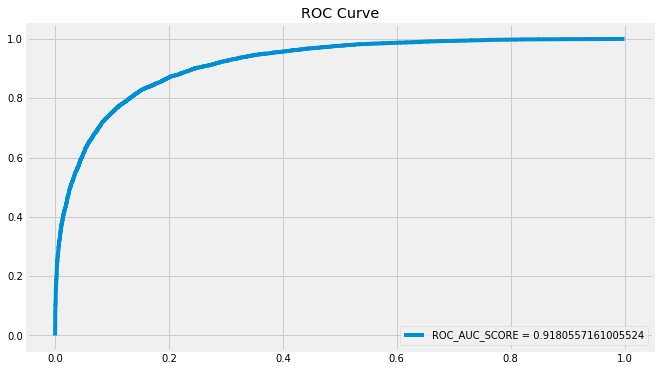

In [65]:
from sklearn.metrics import roc_curve
fpr, tpr, _ = roc_curve(y_test,prediction)
auc = np.mean(ROC_AUC_Score)
plt.figure(figsize=(10,6))
plt.title("ROC Curve")
plt.plot(fpr,tpr,label="ROC_AUC_SCORE = "+str(auc))
plt.legend(loc=4)
plt.show()

In [59]:
prediction=clf.predict(X_test_final)

Final_df=pd.DataFrame()
Final_df['ID_code']=df_test['ID_code']
Final_df['target']=prediction
Final_df.to_csv(r'G:\Santander Prediction\Final_Submission.csv',index=False)